# **Week 1**

## **Team 3**
- Shinto Machado
- Adrián García
- Gerard Asbert
- Kunal Purkayastha

# **Introduction and Hypothesis**

In this notebook we build and analyse a Bag of Visual Words (BoVW) pipeline for image classification.  
The main goal is to understand the role of each component of the pipeline and to identify a good overall configuration by changing one parameter at a time.

**Hypothesis:** Our hypothesis is...

# Imports

In [1]:
from bovw import BOVW
from main import Dataset, train, test

from typing import *
from PIL import Image

import numpy as np
import glob
import tqdm
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold   

# 1. Load dataset, prepare cross validation (3-Fold) and basic pipeline

In [2]:
#LOAD DATASET AND PREPARE 3-FOLD
data_train = Dataset(ImageFolder="../places_reduced/train")
data_val   = Dataset(ImageFolder="../places_reduced/val")
data = data_train + data_val

kfold = KFold(n_splits=3, shuffle=True, random_state=20)

accuracies = []

In [ ]:
#BASIC PIPELINE
for fold, (train_idx, test_idx) in enumerate(kfold.split(data), start=1):
    print(f"\n========== Fold {fold} ==========")
    train_data = [data[i] for i in train_idx]
    test_data  = [data[i] for i in test_idx]

    bovw = BOVW()
    bovw, classifier = train(dataset=train_data, bovw=bovw)

    acc = test(dataset=test_data, bovw=bovw, classifier=classifier)
    accuracies.append(acc)

print("\n========== 3-Fold Cross-Validation ==========")
print("Accuracies per fold:", accuracies)
print("Average accuracy:", np.mean(accuracies))


========== Fold 1 ==========


Phase [Training]: Extracting the descriptors:  12%|█▏        | 879/7266 [00:03<00:25, 253.05it/s]


KeyboardInterrupt: 

# 2. Different Descriptors (Sift, orb, Akaze and Dense SIFT) and different amount of features

In [3]:
# NUMERICAL EXPERIMENTS WITH DIFFERENT DESCRIPTORS AND N_FEATURES (For Dense SIft, default step and scale factor)
detector_types = ['DENSE_SIFT', 'SIFT', 'ORB', 'AKAZE']
n_features_list = [100, 1000, 5000, 10000, 15000]

results = {}

for det in detector_types:
    results[det] = {}

    for nfeat in n_features_list:
        print(f"\n\n###############################")
        print(f"### Descriptor: {det} | n_features = {nfeat}")
        print(f"###############################")

        kfold = KFold(n_splits=3, shuffle=True, random_state=20)

        accuracies = []

        for fold, (train_idx, test_idx) in enumerate(kfold.split(data), start=1):
            print(f"\n========== Fold {fold} ==========")
            train_data = [data[i] for i in train_idx]
            test_data  = [data[i] for i in test_idx]

            # Usar el descriptor correspondiente + n_features cuando tenga sentido
            if det in ['SIFT', 'ORB', 'DENSE_SIFT']:
                detector_kwargs = {'nfeatures': nfeat}
            else:
                detector_kwargs = {}

            bovw = BOVW(detector_type=det, detector_kwargs=detector_kwargs)
            bovw, classifier = train(dataset=train_data, bovw=bovw)

            acc = test(dataset=test_data, bovw=bovw, classifier=classifier)
            accuracies.append(acc)

        print("\n========== 3-Fold Cross-Validation ==========")
        print("Accuracies per fold:", accuracies)
        print("Average accuracy:", np.mean(accuracies))

        results[det][nfeat] = {
            "fold_accuracies": accuracies,
            "mean_accuracy": np.mean(accuracies)
        }

print("\n\n===== Summary over descriptors and n_features =====")
for det in detector_types:
    print(f"\n>>> {det}")
    for nfeat in n_features_list:
        if nfeat in results[det]:
            mean_acc = results[det][nfeat]["mean_accuracy"]
            print(f"  n_features = {nfeat:5d} -> mean accuracy = {mean_acc:.4f}")




###############################
### Descriptor: DENSE_SIFT | n_features = 100
###############################

========== Fold 1 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [01:15<00:00, 95.91it/s] 


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3387007982383705


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3634/3634 [00:32<00:00, 112.87it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.31425426527242706

========== Fold 2 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [01:18<00:00, 93.04it/s] 


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3438833081051328


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:28<00:00, 126.07it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.33140655105973027

========== Fold 3 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [01:20<00:00, 90.25it/s] 


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3341131140773359


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:39<00:00, 93.05it/s] 


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.30993669143958164

========== 3-Fold Cross-Validation ==========
Accuracies per fold: [0.31425426527242706, 0.33140655105973027, 0.30993669143958164]
Average accuracy: 0.31853250259057964


###############################
### Descriptor: DENSE_SIFT | n_features = 1000
###############################

========== Fold 1 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [01:41<00:00, 71.88it/s] 


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.33649876135425266


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3634/3634 [00:39<00:00, 91.08it/s] 


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.3093010456796918

========== Fold 2 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [01:39<00:00, 72.76it/s] 


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3503509013348012


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:26<00:00, 135.77it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.33553537021745117

========== Fold 3 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [01:35<00:00, 76.26it/s] 


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3507637264345672


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:39<00:00, 91.62it/s] 


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.32342416735480317

========== 3-Fold Cross-Validation ==========
Accuracies per fold: [0.3093010456796918, 0.33553537021745117, 0.32342416735480317]
Average accuracy: 0.3227535277506487


###############################
### Descriptor: DENSE_SIFT | n_features = 5000
###############################

========== Fold 1 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [01:34<00:00, 76.55it/s] 


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3404899532067162


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3634/3634 [00:40<00:00, 90.53it/s] 


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.3186571271326362

========== Fold 2 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [01:35<00:00, 76.22it/s] 


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3414063575065364


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:41<00:00, 87.29it/s] 


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.3192953481970823

========== Fold 3 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [02:06<00:00, 57.24it/s] 


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.34525939177101966


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:45<00:00, 79.97it/s] 


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.31323974676575833

========== 3-Fold Cross-Validation ==========
Accuracies per fold: [0.3186571271326362, 0.3192953481970823, 0.31323974676575833]
Average accuracy: 0.3170640740318256


###############################
### Descriptor: DENSE_SIFT | n_features = 10000
###############################

========== Fold 1 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [02:14<00:00, 54.12it/s] 


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.34406826314340766


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3634/3634 [00:48<00:00, 75.35it/s] 


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.3093010456796918

========== Fold 2 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [01:55<00:00, 62.82it/s] 


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3401678822072382


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:50<00:00, 72.33it/s] 


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.3220478943022296

========== Fold 3 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [02:03<00:00, 58.78it/s] 


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.32860877941378835


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:54<00:00, 66.92it/s] 


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.3107624552711258

========== 3-Fold Cross-Validation ==========
Accuracies per fold: [0.3093010456796918, 0.3220478943022296, 0.3107624552711258]
Average accuracy: 0.3140371317510157


###############################
### Descriptor: DENSE_SIFT | n_features = 15000
###############################

========== Fold 1 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [02:02<00:00, 59.34it/s] 


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.33553537021745117


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3634/3634 [01:04<00:00, 56.29it/s] 


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.30957622454595485

========== Fold 2 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [02:44<00:00, 44.24it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3363148479427549


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [01:02<00:00, 57.75it/s] 


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.3187448389760528

========== Fold 3 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [02:42<00:00, 44.76it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3425072244392459


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [01:03<00:00, 57.32it/s] 


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.3231489127442885

========== 3-Fold Cross-Validation ==========
Accuracies per fold: [0.30957622454595485, 0.3187448389760528, 0.3231489127442885]
Average accuracy: 0.31715665875543203


###############################
### Descriptor: SIFT | n_features = 100
###############################

========== Fold 1 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [01:20<00:00, 90.28it/s] 


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.2564349621472815


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3634/3634 [00:38<00:00, 93.69it/s] 


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.2224057252958987

========== Fold 2 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [01:41<00:00, 71.95it/s] 


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.252856159669649


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:42<00:00, 85.93it/s] 


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.2224057252958987

========== Fold 3 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [01:47<00:00, 67.48it/s] 


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.2551610239471511


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:40<00:00, 88.77it/s] 


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.22935022026431717

========== 3-Fold Cross-Validation ==========
Accuracies per fold: [0.2224057252958987, 0.2224057252958987, 0.22935022026431717]
Average accuracy: 0.2247205569520382


###############################
### Descriptor: SIFT | n_features = 1000
###############################

========== Fold 1 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [01:37<00:00, 74.73it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.31369580178940126


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3634/3634 [00:52<00:00, 69.76it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.2887420864299477

========== Fold 2 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [01:47<00:00, 67.64it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.32360633172746045


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:51<00:00, 70.36it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.30993669143958164

========== Fold 3 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [01:51<00:00, 64.95it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3129644921552436


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:53<00:00, 67.87it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.29487885462555063

========== 3-Fold Cross-Validation ==========
Accuracies per fold: [0.2887420864299477, 0.30993669143958164, 0.29487885462555063]
Average accuracy: 0.29785254416502666


###############################
### Descriptor: SIFT | n_features = 5000
###############################

========== Fold 1 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [01:47<00:00, 67.32it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3143840330350998


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3634/3634 [00:55<00:00, 65.20it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.28736581337737405

========== Fold 2 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [02:00<00:00, 60.09it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3165863730213352


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:57<00:00, 63.60it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.2857142857142857

========== Fold 3 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [02:02<00:00, 59.52it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3168180567024498


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:56<00:00, 64.02it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.2904735682819383

========== 3-Fold Cross-Validation ==========
Accuracies per fold: [0.28736581337737405, 0.2857142857142857, 0.2904735682819383]
Average accuracy: 0.28785122245786604


###############################
### Descriptor: SIFT | n_features = 10000
###############################

========== Fold 1 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [01:55<00:00, 62.77it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3052993805918789


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3634/3634 [00:57<00:00, 63.53it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.28296173960913845

========== Fold 2 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [01:58<00:00, 61.09it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3194769442532691


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [01:00<00:00, 59.79it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.29644921552436004

========== Fold 3 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [02:10<00:00, 55.55it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3133773740710157


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:59<00:00, 61.10it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.30066079295154186

========== 3-Fold Cross-Validation ==========
Accuracies per fold: [0.28296173960913845, 0.29644921552436004, 0.30066079295154186]
Average accuracy: 0.2933572493616801


###############################
### Descriptor: SIFT | n_features = 15000
###############################

========== Fold 1 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [02:09<00:00, 56.16it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.31149346180316584


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3634/3634 [00:59<00:00, 60.85it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.29452243325075694

========== Fold 2 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [02:07<00:00, 57.19it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3097040605643496


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:59<00:00, 60.92it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.2989265070189926

========== Fold 3 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [02:07<00:00, 57.01it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.32837875034406827


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [01:00<00:00, 60.39it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.2918502202643172

========== 3-Fold Cross-Validation ==========
Accuracies per fold: [0.29452243325075694, 0.2989265070189926, 0.2918502202643172]
Average accuracy: 0.2950997201780223


###############################
### Descriptor: ORB | n_features = 100
###############################

========== Fold 1 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [00:11<00:00, 656.89it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.1836453744493392


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3634/3634 [00:05<00:00, 656.20it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.1434076520781723

========== Fold 2 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [00:11<00:00, 660.12it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.18940123881624227


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:05<00:00, 643.54it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.15859030837004406

========== Fold 3 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [00:13<00:00, 534.02it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.18403303509979352


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:05<00:00, 609.78it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.15501101321585903

========== 3-Fold Cross-Validation ==========
Accuracies per fold: [0.1434076520781723, 0.15859030837004406, 0.15501101321585903]
Average accuracy: 0.1523363245546918


###############################
### Descriptor: ORB | n_features = 1000
###############################

========== Fold 1 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [00:16<00:00, 445.50it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.20856277533039647


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3634/3634 [00:07<00:00, 457.57it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.17974126066611615

========== Fold 2 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [00:15<00:00, 459.72it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.21087405368203715


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:07<00:00, 458.27it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.1883259911894273

========== Fold 3 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [00:15<00:00, 463.72it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.21032346868547833


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:08<00:00, 453.05it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.18034140969162996

========== 3-Fold Cross-Validation ==========
Accuracies per fold: [0.17974126066611615, 0.1883259911894273, 0.18034140969162996]
Average accuracy: 0.18280288718239113


###############################
### Descriptor: ORB | n_features = 5000
###############################

========== Fold 1 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [00:21<00:00, 340.67it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.2263215859030837


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3634/3634 [00:10<00:00, 333.56it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.19653179190751446

========== Fold 2 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [00:21<00:00, 336.62it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.22243633860977288


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:10<00:00, 337.19it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.2084251101321586

========== Fold 3 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [00:21<00:00, 340.67it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.222849277357192


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:10<00:00, 333.09it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.20677312775330398

========== 3-Fold Cross-Validation ==========
Accuracies per fold: [0.19653179190751446, 0.2084251101321586, 0.20677312775330398]
Average accuracy: 0.20391000993099237


###############################
### Descriptor: ORB | n_features = 10000
###############################

========== Fold 1 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [00:21<00:00, 331.48it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.2261839207048458


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3634/3634 [00:11<00:00, 325.35it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.20176162950729426

========== Fold 2 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [00:22<00:00, 328.68it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.22477632484514798


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:10<00:00, 332.91it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.20704845814977973

========== Fold 3 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [00:21<00:00, 333.47it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.21954576737783896


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:11<00:00, 324.82it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.20594713656387664

========== 3-Fold Cross-Validation ==========
Accuracies per fold: [0.20176162950729426, 0.20704845814977973, 0.20594713656387664]
Average accuracy: 0.2049190747403169


###############################
### Descriptor: ORB | n_features = 15000
###############################

========== Fold 1 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [00:22<00:00, 328.79it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.22590859030837004


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3634/3634 [00:11<00:00, 320.79it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.20258739333883843

========== Fold 2 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [00:22<00:00, 327.01it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.22491397109428768


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:11<00:00, 324.64it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.20484581497797358

========== Fold 3 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [00:22<00:00, 329.18it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.22216104611149345


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:11<00:00, 319.36it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.20236784140969163

========== 3-Fold Cross-Validation ==========
Accuracies per fold: [0.20258739333883843, 0.20484581497797358, 0.20236784140969163]
Average accuracy: 0.2032670165755012


###############################
### Descriptor: AKAZE | n_features = 100
###############################

========== Fold 1 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [00:31<00:00, 234.20it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.21174524400330852


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3634/3634 [00:17<00:00, 207.55it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.18798235942668137

========== Fold 2 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [00:31<00:00, 228.14it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.21442360728075013


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:17<00:00, 207.03it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.19586776859504132

========== Fold 3 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [00:32<00:00, 226.70it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.22265086800771564


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:17<00:00, 206.88it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.19646799116997793

========== 3-Fold Cross-Validation ==========
Accuracies per fold: [0.18798235942668137, 0.19586776859504132, 0.19646799116997793]
Average accuracy: 0.19343937306390022


###############################
### Descriptor: AKAZE | n_features = 1000
###############################

========== Fold 1 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [00:32<00:00, 224.91it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.21753515301902399


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3634/3634 [00:17<00:00, 205.65it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.18632855567805953

========== Fold 2 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [00:31<00:00, 227.10it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.21842250413678985


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:17<00:00, 211.79it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.1881542699724518

========== Fold 3 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [00:32<00:00, 224.53it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.21397079085147425


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:17<00:00, 209.25it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.19232891832229582

========== 3-Fold Cross-Validation ==========
Accuracies per fold: [0.18632855567805953, 0.1881542699724518, 0.19232891832229582]
Average accuracy: 0.1889372479909357


###############################
### Descriptor: AKAZE | n_features = 5000
###############################

========== Fold 1 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [00:31<00:00, 227.37it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.21822442790184726


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3634/3634 [00:18<00:00, 200.51it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.18577728776185226

========== Fold 2 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [00:32<00:00, 226.12it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.2111141753998897


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:17<00:00, 203.47it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.19504132231404958

========== Fold 3 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [00:31<00:00, 228.85it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.218793055938275


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:18<00:00, 201.58it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.18653421633554085

========== 3-Fold Cross-Validation ==========
Accuracies per fold: [0.18577728776185226, 0.19504132231404958, 0.18653421633554085]
Average accuracy: 0.18911760880381423


###############################
### Descriptor: AKAZE | n_features = 10000
###############################

========== Fold 1 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [00:31<00:00, 227.62it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.2178108629721533


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3634/3634 [00:17<00:00, 204.88it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.18963616317530319

========== Fold 2 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [00:32<00:00, 222.84it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.21359624931053503


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:17<00:00, 204.08it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.19008264462809918

========== Fold 3 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [00:32<00:00, 224.08it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.21906861394323504


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:17<00:00, 202.50it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.18625827814569537

========== 3-Fold Cross-Validation ==========
Accuracies per fold: [0.18963616317530319, 0.19008264462809918, 0.18625827814569537]
Average accuracy: 0.18865902864969927


###############################
### Descriptor: AKAZE | n_features = 15000
###############################

========== Fold 1 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [00:32<00:00, 226.31it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.21767300799558864


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3634/3634 [00:18<00:00, 199.56it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.18495038588754134

========== Fold 2 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [00:32<00:00, 223.03it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.20615002757859902


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:18<00:00, 199.74it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.19090909090909092

========== Fold 3 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [00:32<00:00, 224.37it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.21769082391843483


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:17<00:00, 210.42it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.19757174392935983

========== 3-Fold Cross-Validation ==========
Accuracies per fold: [0.18495038588754134, 0.19090909090909092, 0.19757174392935983]
Average accuracy: 0.19114374024199735


===== Summary over descriptors and n_features =====

>>> DENSE_SIFT
  n_features =   100 -> mean accuracy = 0.3185
  n_features =  1000 -> mean accuracy = 0.3228
  n_features =  5000 -> mean accuracy = 0.3171
  n_features = 10000 -> mean accuracy = 0.3140
  n_features = 15000 -> mean accuracy = 0.3172

>>> SIFT
  n_features =   100 -> mean accuracy = 0.2247
  n_features =  1000 -> mean accuracy = 0.2979
  n_features =  5000 -> mean accuracy = 0.2879
  n_features = 10000 -> mean accuracy = 0.2934
  n_features = 15000 -> mean accuracy = 0.2951

>>> ORB
  n_features =   100 -> mean accuracy = 0.1523
  n_features =  1000 -> mean accuracy = 0.1828
  n_features =  5000 -> mean accuracy = 0.2039
  n_features = 10000 -> mean accu

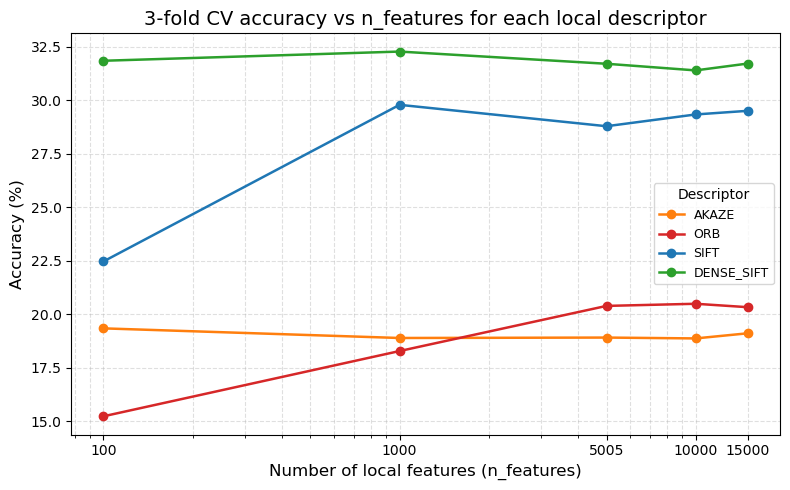

In [5]:
# Plots of Cross-val w/ 3 folds average accuracy for different amount of features and descriptors
data_nf = {
    'Method': [
        'AKAZE', 'AKAZE', 'AKAZE', 'AKAZE', 'AKAZE',
        'ORB', 'ORB', 'ORB', 'ORB', 'ORB',
        'SIFT', 'SIFT', 'SIFT', 'SIFT', 'SIFT',
        'DENSE_SIFT', 'DENSE_SIFT', 'DENSE_SIFT', 'DENSE_SIFT', 'DENSE_SIFT'
    ],
    'n_features': [
        100, 1000, 5000, 10000, 15000,   # AKAZE
        100, 1000, 5000, 10000, 15000,   # ORB
        100, 1000, 5000, 10000, 15000,   # SIFT
        100, 1000, 5000, 10000, 15000    # DENSE_SIFT
    ],
    'Accuracy': [
        # AKAZE
        19.34, 18.89, 18.91, 18.87, 19.11,
        # ORB
        15.23, 18.28, 20.39, 20.49, 20.33,
        # SIFT
        22.47, 29.79, 28.79, 29.34, 29.51,
        # DENSE_SIFT
        31.85, 32.28, 31.71, 31.40, 31.72
    ]
}


df_nf = pd.DataFrame(data_nf)

methods = ['AKAZE', 'ORB', 'SIFT', 'DENSE_SIFT']
colors = {
    'AKAZE': 'tab:orange',
    'ORB': 'tab:red',
    'SIFT': 'tab:blue',
    'DENSE_SIFT': 'tab:green'
}

plt.figure(figsize=(8, 5))

for method in methods:
    sub = df_nf[df_nf['Method'] == method].sort_values('n_features')
    plt.plot(
        sub['n_features'],
        sub['Accuracy'],
        marker='o',
        linewidth=1.8,
        label=method,
        color=colors.get(method, None)
    )

plt.xscale('log')  # tiene sentido porque 100→15000 es rango grande
plt.xticks([100, 1000, 5000, 10000, 15000], [100, 1000, 5005, 10000, 15000])
plt.xlabel('Number of local features (n_features)', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('3-fold CV accuracy vs n_features for each local descriptor', fontsize=14)
plt.grid(True, which='both', linestyle='--', alpha=0.4)
plt.legend(title='Descriptor', fontsize=9)
plt.tight_layout()
plt.show()


## 2.1 Dense Sift with different steps and different scales

In [4]:
#NUMERICAL EXPERIMENTS WITH DIFFERENT STEPS AND SCALE FACTORS FOR DENSE SIFT
step_sizes = [4, 8, 16, 32]
scale_factors = [1/4, 1/2, 1, 2]  # 0.25x, 0.5x, 1x, 2x, 4x el step

results = {}  # para guardar media por (step, scale_factor)

for step in step_sizes:
    for factor in scale_factors:
        kp_size = step * factor  # scale = factor * step

        print("\n=======================================")
        print(f"Step size = {step}, scale factor = {factor} (kp_size = {kp_size})")
        print("=======================================")

        for fold, (train_idx, test_idx) in enumerate(kfold.split(data), start=1):
            print(f"\n========== Fold {fold} ==========")
            train_data = [data[i] for i in train_idx]
            test_data  = [data[i] for i in test_idx]

            bovw = BOVW(
                detector_type="DENSE_SIFT",
                detector_kwargs={
                    'step_size': step,
                    'kp_size': kp_size   # aquí va la escala
                }
            )

            bovw, classifier = train(dataset=train_data, bovw=bovw)
            acc = test(dataset=test_data, bovw=bovw, classifier=classifier)
            accuracies.append(acc)

        print("\n========== 3-Fold Cross-Validation ==========")
        print("Accuracies per fold:", accuracies)
        print("Average accuracy:", np.mean(accuracies))

        results[(step, factor)] = np.mean(accuracies)

print("\n\n===== Summary over (step_size, scale_factor) =====")
for (step, factor), mean_acc in results.items():
    print(f"step={step:2d}, scale_factor={factor:4.2f} (kp_size={step*factor:5.2f}) -> mean acc = {mean_acc:.4f}")



Step size = 4, scale factor = 0.25 (kp_size = 1.0)

========== Fold 1 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [00:39<00:00, 183.90it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3199834847233691


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3634/3634 [00:21<00:00, 172.23it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.30902586681342875

========== Fold 2 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [00:40<00:00, 177.39it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.32282922801706343


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:22<00:00, 162.62it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.31021194605009633

========== Fold 3 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [00:38<00:00, 189.41it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.32145314435117656


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:22<00:00, 160.57it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.3118634737131847

========== 3-Fold Cross-Validation ==========
Accuracies per fold: [0.18495038588754134, 0.19090909090909092, 0.19757174392935983, 0.30902586681342875, 0.31021194605009633, 0.3118634737131847]
Average accuracy: 0.25075541788378364

Step size = 4, scale factor = 0.5 (kp_size = 2.0)

========== Fold 1 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [01:11<00:00, 101.34it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3424167354803193


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3634/3634 [00:39<00:00, 93.16it/s] 


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.3194826637314254

========== Fold 2 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [01:10<00:00, 103.78it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3378285399752305


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:38<00:00, 93.96it/s] 


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.3198458574181118

========== Fold 3 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [01:08<00:00, 106.22it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3415439658731251


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:40<00:00, 90.15it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.3220478943022296

========== 3-Fold Cross-Validation ==========
Accuracies per fold: [0.18495038588754134, 0.19090909090909092, 0.19757174392935983, 0.30902586681342875, 0.31021194605009633, 0.3118634737131847, 0.3194826637314254, 0.3198458574181118, 0.3220478943022296]
Average accuracy: 0.2739898803060521

Step size = 4, scale factor = 1 (kp_size = 4)

========== Fold 1 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [06:58<00:00, 17.35it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.34778420038535646


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3634/3634 [03:34<00:00, 16.96it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.3227848101265823

========== Fold 2 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [06:57<00:00, 17.42it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.336727673042521


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [03:33<00:00, 16.98it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.3181943297550234

========== Fold 3 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [06:28<00:00, 18.68it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3386541901747626


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [03:30<00:00, 17.25it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.32755298651252407

========== 3-Fold Cross-Validation ==========
Accuracies per fold: [0.18495038588754134, 0.19090909090909092, 0.19757174392935983, 0.30902586681342875, 0.31021194605009633, 0.3118634737131847, 0.3194826637314254, 0.3198458574181118, 0.3220478943022296, 0.3227848101265823, 0.3181943297550234, 0.32755298651252407]
Average accuracy: 0.2862034207623832

Step size = 4, scale factor = 2 (kp_size = 8)

========== Fold 1 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [14:51<00:00,  8.15it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.34778420038535646


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3634/3634 [07:25<00:00,  8.15it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.3244358833241607

========== Fold 2 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [14:49<00:00,  8.17it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.34305765790560067


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [07:22<00:00,  8.21it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.3176438205339939

========== Fold 3 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [14:47<00:00,  8.19it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.33425072244392456


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [07:32<00:00,  8.03it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.30800990916597853

========== 3-Fold Cross-Validation ==========
Accuracies per fold: [0.18495038588754134, 0.19090909090909092, 0.19757174392935983, 0.30902586681342875, 0.31021194605009633, 0.3118634737131847, 0.3194826637314254, 0.3198458574181118, 0.3220478943022296, 0.3227848101265823, 0.3181943297550234, 0.32755298651252407, 0.3244358833241607, 0.3176438205339939, 0.30800990916597853]
Average accuracy: 0.2923020441448487

Step size = 8, scale factor = 0.25 (kp_size = 2.0)

========== Fold 1 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [00:31<00:00, 232.19it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.32603908615469307


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3634/3634 [00:15<00:00, 234.70it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.29141441937259216

========== Fold 2 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [00:27<00:00, 267.11it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.326544653914958


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:13<00:00, 272.43it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.3140655105973025

========== Fold 3 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [00:27<00:00, 261.65it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.33053529654603


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:12<00:00, 287.05it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.3074593999449491

========== 3-Fold Cross-Validation ==========
Accuracies per fold: [0.18495038588754134, 0.19090909090909092, 0.19757174392935983, 0.30902586681342875, 0.31021194605009633, 0.3118634737131847, 0.3194826637314254, 0.3198458574181118, 0.3220478943022296, 0.3227848101265823, 0.3181943297550234, 0.32755298651252407, 0.3244358833241607, 0.3176438205339939, 0.30800990916597853, 0.29141441937259216, 0.3140655105973025, 0.3074593999449491]
Average accuracy: 0.2943038884493097

Step size = 8, scale factor = 0.5 (kp_size = 4.0)

========== Fold 1 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [02:32<00:00, 47.67it/s] 


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.33801266171208366


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3634/3634 [01:14<00:00, 49.05it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.30489818381948264

========== Fold 2 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [02:42<00:00, 44.59it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.34071831567359295


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [01:13<00:00, 49.29it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.3179190751445087

========== Fold 3 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [02:43<00:00, 44.46it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3354891977432228


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [01:11<00:00, 51.04it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.32039636663914123

========== 3-Fold Cross-Validation ==========
Accuracies per fold: [0.18495038588754134, 0.19090909090909092, 0.19757174392935983, 0.30902586681342875, 0.31021194605009633, 0.3118634737131847, 0.3194826637314254, 0.3198458574181118, 0.3220478943022296, 0.3227848101265823, 0.3181943297550234, 0.32755298651252407, 0.3244358833241607, 0.3176438205339939, 0.30800990916597853, 0.29141441937259216, 0.3140655105973025, 0.3074593999449491, 0.30489818381948264, 0.3179190751445087, 0.32039636663914123]
Average accuracy: 0.2971754103662242

Step size = 8, scale factor = 1 (kp_size = 8)

========== Fold 1 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [05:03<00:00, 23.97it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3304431599229287


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3634/3634 [02:10<00:00, 27.78it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.3150798018712163

========== Fold 2 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [04:55<00:00, 24.60it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.34305765790560067


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [02:13<00:00, 27.20it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.3236994219653179

========== Fold 3 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [04:54<00:00, 24.65it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.33480115591027937


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [02:11<00:00, 27.67it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.31544178364987613

========== 3-Fold Cross-Validation ==========
Accuracies per fold: [0.18495038588754134, 0.19090909090909092, 0.19757174392935983, 0.30902586681342875, 0.31021194605009633, 0.3118634737131847, 0.3194826637314254, 0.3198458574181118, 0.3220478943022296, 0.3227848101265823, 0.3181943297550234, 0.32755298651252407, 0.3244358833241607, 0.3176438205339939, 0.30800990916597853, 0.29141441937259216, 0.3140655105973025, 0.3074593999449491, 0.30489818381948264, 0.3179190751445087, 0.32039636663914123, 0.3150798018712163, 0.3236994219653179, 0.31544178364987613]
Average accuracy: 0.29978769271571326

Step size = 8, scale factor = 2 (kp_size = 16)

========== Fold 1 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [12:16<00:00,  9.87it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3176438205339939


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3634/3634 [06:19<00:00,  9.59it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.2872867363786461

========== Fold 2 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [17:45<00:00,  6.82it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3160864180542177


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [07:59<00:00,  7.57it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.30167905312413984

========== Fold 3 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [22:09<00:00,  5.46it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3222787945507087


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [08:57<00:00,  6.76it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.29755023396641894

========== 3-Fold Cross-Validation ==========
Accuracies per fold: [0.18495038588754134, 0.19090909090909092, 0.19757174392935983, 0.30902586681342875, 0.31021194605009633, 0.3118634737131847, 0.3194826637314254, 0.3198458574181118, 0.3220478943022296, 0.3227848101265823, 0.3181943297550234, 0.32755298651252407, 0.3244358833241607, 0.3176438205339939, 0.30800990916597853, 0.29141441937259216, 0.3140655105973025, 0.3074593999449491, 0.30489818381948264, 0.3179190751445087, 0.32039636663914123, 0.3150798018712163, 0.3236994219653179, 0.31544178364987613, 0.2872867363786461, 0.30167905312413984, 0.29755023396641894]
Average accuracy: 0.2993118758757898

Step size = 16, scale factor = 0.25 (kp_size = 4.0)

========== Fold 1 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [01:40<00:00, 72.64it/s] 


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.33388384255436276


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3634/3634 [00:24<00:00, 150.16it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.2988442487616951

========== Fold 2 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [01:34<00:00, 77.31it/s] 


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3198018439521123


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:24<00:00, 146.21it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.29342141480869804

========== Fold 3 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [01:31<00:00, 79.83it/s] 


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.32269161965047477


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:24<00:00, 150.25it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.3096614368290669

========== 3-Fold Cross-Validation ==========
Accuracies per fold: [0.18495038588754134, 0.19090909090909092, 0.19757174392935983, 0.30902586681342875, 0.31021194605009633, 0.3118634737131847, 0.3194826637314254, 0.3198458574181118, 0.3220478943022296, 0.3227848101265823, 0.3181943297550234, 0.32755298651252407, 0.3244358833241607, 0.3176438205339939, 0.30800990916597853, 0.29141441937259216, 0.3140655105973025, 0.3074593999449491, 0.30489818381948264, 0.3179190751445087, 0.32039636663914123, 0.3150798018712163, 0.3236994219653179, 0.31544178364987613, 0.2872867363786461, 0.30167905312413984, 0.29755023396641894, 0.2988442487616951, 0.29342141480869804, 0.3096614368290669]
Average accuracy: 0.2994449249681928

Step size = 16, scale factor = 0.5 (kp_size = 8.0)

========== Fold 1 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [02:03<00:00, 58.73it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3257638315441784


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3634/3634 [00:44<00:00, 82.34it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.29086406164006606

========== Fold 2 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [02:02<00:00, 59.21it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3281959543140223


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:45<00:00, 79.99it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.3093861822185522

========== Fold 3 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [02:06<00:00, 57.26it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3317737718453282


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:48<00:00, 75.36it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.31351500137627303

========== 3-Fold Cross-Validation ==========
Accuracies per fold: [0.18495038588754134, 0.19090909090909092, 0.19757174392935983, 0.30902586681342875, 0.31021194605009633, 0.3118634737131847, 0.3194826637314254, 0.3198458574181118, 0.3220478943022296, 0.3227848101265823, 0.3181943297550234, 0.32755298651252407, 0.3244358833241607, 0.3176438205339939, 0.30800990916597853, 0.29141441937259216, 0.3140655105973025, 0.3074593999449491, 0.30489818381948264, 0.3179190751445087, 0.32039636663914123, 0.3150798018712163, 0.3236994219653179, 0.31544178364987613, 0.2872867363786461, 0.30167905312413984, 0.29755023396641894, 0.2988442487616951, 0.29342141480869804, 0.3096614368290669, 0.29086406164006606, 0.3093861822185522, 0.31351500137627303]
Average accuracy: 0.29991251497820226

Step size = 16, scale factor = 1 (kp_size = 16)

========== Fold 1 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [02:37<00:00, 46.01it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.30979906413432423


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3634/3634 [01:13<00:00, 49.25it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.2779306549257017

========== Fold 2 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [02:39<00:00, 45.56it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3148479427549195


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [01:13<00:00, 49.11it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.3044315992292871

========== Fold 3 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [02:39<00:00, 45.68it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.30975643319113805


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [01:13<00:00, 49.16it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.29755023396641894

========== 3-Fold Cross-Validation ==========
Accuracies per fold: [0.18495038588754134, 0.19090909090909092, 0.19757174392935983, 0.30902586681342875, 0.31021194605009633, 0.3118634737131847, 0.3194826637314254, 0.3198458574181118, 0.3220478943022296, 0.3227848101265823, 0.3181943297550234, 0.32755298651252407, 0.3244358833241607, 0.3176438205339939, 0.30800990916597853, 0.29141441937259216, 0.3140655105973025, 0.3074593999449491, 0.30489818381948264, 0.3179190751445087, 0.32039636663914123, 0.3150798018712163, 0.3236994219653179, 0.31544178364987613, 0.2872867363786461, 0.30167905312413984, 0.29755023396641894, 0.2988442487616951, 0.29342141480869804, 0.3096614368290669, 0.29086406164006606, 0.3093861822185522, 0.31351500137627303, 0.2779306549257017, 0.3044315992292871, 0.29755023396641894]
Average accuracy: 0.2993618189556134

Step size = 16, scale factor = 2 (kp_size = 32)

==========

Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [03:46<00:00, 32.03it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.279383429672447


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3634/3634 [01:52<00:00, 32.19it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.24656026417171162

========== Fold 2 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [03:46<00:00, 32.02it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.26393284711710474


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [01:52<00:00, 32.22it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.253234241673548

========== Fold 3 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [03:47<00:00, 31.91it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.286775835970827


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [01:52<00:00, 32.42it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.2617671345995045

========== 3-Fold Cross-Validation ==========
Accuracies per fold: [0.18495038588754134, 0.19090909090909092, 0.19757174392935983, 0.30902586681342875, 0.31021194605009633, 0.3118634737131847, 0.3194826637314254, 0.3198458574181118, 0.3220478943022296, 0.3227848101265823, 0.3181943297550234, 0.32755298651252407, 0.3244358833241607, 0.3176438205339939, 0.30800990916597853, 0.29141441937259216, 0.3140655105973025, 0.3074593999449491, 0.30489818381948264, 0.3179190751445087, 0.32039636663914123, 0.3150798018712163, 0.3236994219653179, 0.31544178364987613, 0.2872867363786461, 0.30167905312413984, 0.29755023396641894, 0.2988442487616951, 0.29342141480869804, 0.3096614368290669, 0.29086406164006606, 0.3093861822185522, 0.31351500137627303, 0.2779306549257017, 0.3044315992292871, 0.29755023396641894, 0.24656026417171162, 0.253234241673548, 0.2617671345995045]
Average accuracy: 0.29586120827812423


Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [00:30<00:00, 237.40it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.30470685383980184


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3634/3634 [00:14<00:00, 249.64it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.28233351678591084

========== Fold 2 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [00:32<00:00, 223.64it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.30438970689417916


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:14<00:00, 253.75it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.28075970272502065

========== Fold 3 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [00:31<00:00, 231.28it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3083803495252511


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:14<00:00, 246.70it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.27167630057803466

========== 3-Fold Cross-Validation ==========
Accuracies per fold: [0.18495038588754134, 0.19090909090909092, 0.19757174392935983, 0.30902586681342875, 0.31021194605009633, 0.3118634737131847, 0.3194826637314254, 0.3198458574181118, 0.3220478943022296, 0.3227848101265823, 0.3181943297550234, 0.32755298651252407, 0.3244358833241607, 0.3176438205339939, 0.30800990916597853, 0.29141441937259216, 0.3140655105973025, 0.3074593999449491, 0.30489818381948264, 0.3179190751445087, 0.32039636663914123, 0.3150798018712163, 0.3236994219653179, 0.31544178364987613, 0.2872867363786461, 0.30167905312413984, 0.29755023396641894, 0.2988442487616951, 0.29342141480869804, 0.3096614368290669, 0.29086406164006606, 0.3093861822185522, 0.31351500137627303, 0.2779306549257017, 0.3044315992292871, 0.29755023396641894, 0.24656026417171162, 0.253234241673548, 0.2617671345995045, 0.28233351678591084, 0.28075970272502

Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [01:00<00:00, 119.43it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3096614368290669


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3634/3634 [00:32<00:00, 112.80it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.2746285085305449

========== Fold 2 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [01:01<00:00, 117.24it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.30480253199394525


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:29<00:00, 121.31it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.2958987063033306

========== Fold 3 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [00:57<00:00, 126.61it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.30549057382688866


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:32<00:00, 111.71it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.282411230388109

========== 3-Fold Cross-Validation ==========
Accuracies per fold: [0.18495038588754134, 0.19090909090909092, 0.19757174392935983, 0.30902586681342875, 0.31021194605009633, 0.3118634737131847, 0.3194826637314254, 0.3198458574181118, 0.3220478943022296, 0.3227848101265823, 0.3181943297550234, 0.32755298651252407, 0.3244358833241607, 0.3176438205339939, 0.30800990916597853, 0.29141441937259216, 0.3140655105973025, 0.3074593999449491, 0.30489818381948264, 0.3179190751445087, 0.32039636663914123, 0.3150798018712163, 0.3236994219653179, 0.31544178364987613, 0.2872867363786461, 0.30167905312413984, 0.29755023396641894, 0.2988442487616951, 0.29342141480869804, 0.3096614368290669, 0.29086406164006606, 0.3093861822185522, 0.31351500137627303, 0.2779306549257017, 0.3044315992292871, 0.29755023396641894, 0.24656026417171162, 0.253234241673548, 0.2617671345995045, 0.28233351678591084, 0.2807597027250206

Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [01:07<00:00, 106.97it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.2764932562620424


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3634/3634 [00:34<00:00, 104.17it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.23362685745734726

========== Fold 2 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [01:08<00:00, 106.11it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.26696023118205586


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:33<00:00, 107.10it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.25681255161023947

========== Fold 3 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [01:08<00:00, 106.45it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.2640704554836934


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:33<00:00, 107.10it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.24057252958987063

========== 3-Fold Cross-Validation ==========
Accuracies per fold: [0.18495038588754134, 0.19090909090909092, 0.19757174392935983, 0.30902586681342875, 0.31021194605009633, 0.3118634737131847, 0.3194826637314254, 0.3198458574181118, 0.3220478943022296, 0.3227848101265823, 0.3181943297550234, 0.32755298651252407, 0.3244358833241607, 0.3176438205339939, 0.30800990916597853, 0.29141441937259216, 0.3140655105973025, 0.3074593999449491, 0.30489818381948264, 0.3179190751445087, 0.32039636663914123, 0.3150798018712163, 0.3236994219653179, 0.31544178364987613, 0.2872867363786461, 0.30167905312413984, 0.29755023396641894, 0.2988442487616951, 0.29342141480869804, 0.3096614368290669, 0.29086406164006606, 0.3093861822185522, 0.31351500137627303, 0.2779306549257017, 0.3044315992292871, 0.29755023396641894, 0.24656026417171162, 0.253234241673548, 0.2617671345995045, 0.28233351678591084, 0.28075970272502

Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [02:23<00:00, 50.69it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.26273052573630606


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3634/3634 [01:10<00:00, 51.39it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.24298293891029168

========== Fold 2 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [02:24<00:00, 50.26it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.26131828815191965


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [01:11<00:00, 50.86it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.2526837324525186

========== Fold 3 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [02:22<00:00, 50.89it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.25746525388743635


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [01:11<00:00, 51.02it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.23589320121112028

========== 3-Fold Cross-Validation ==========
Accuracies per fold: [0.18495038588754134, 0.19090909090909092, 0.19757174392935983, 0.30902586681342875, 0.31021194605009633, 0.3118634737131847, 0.3194826637314254, 0.3198458574181118, 0.3220478943022296, 0.3227848101265823, 0.3181943297550234, 0.32755298651252407, 0.3244358833241607, 0.3176438205339939, 0.30800990916597853, 0.29141441937259216, 0.3140655105973025, 0.3074593999449491, 0.30489818381948264, 0.3179190751445087, 0.32039636663914123, 0.3150798018712163, 0.3236994219653179, 0.31544178364987613, 0.2872867363786461, 0.30167905312413984, 0.29755023396641894, 0.2988442487616951, 0.29342141480869804, 0.3096614368290669, 0.29086406164006606, 0.3093861822185522, 0.31351500137627303, 0.2779306549257017, 0.3044315992292871, 0.29755023396641894, 0.24656026417171162, 0.253234241673548, 0.2617671345995045, 0.28233351678591084, 0.28075970272502

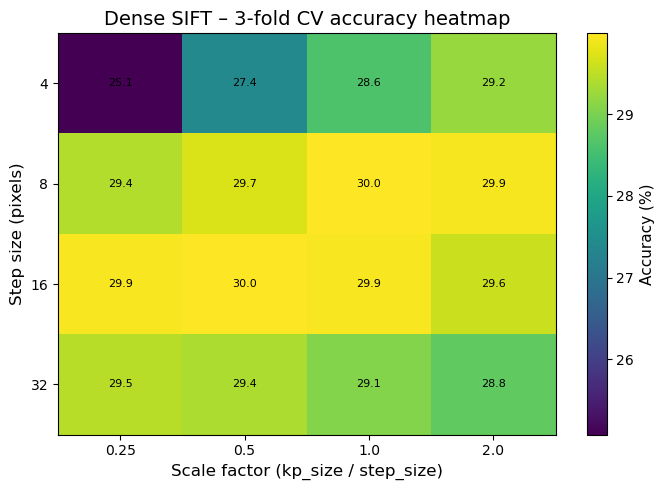

In [7]:
# Plots of Cross-val w/ 3 folds accuracy for different steps and scales , obtained from the previous experiment for DENSE SIFT
dense_sift_scores = {
    4: {
        "scale_values": [0.25, 0.5, 1.0, 2.0],
        "mean_scores": [
            25.08,  # step=4,  scale=0.25
            27.40,  # step=4,  scale=0.50
            28.62,  # step=4,  scale=1.00
            29.23,  # step=4,  scale=2.00
        ],
    },
    8: {
        "scale_values": [0.25, 0.5, 1.0, 2.0],
        "mean_scores": [
            29.43,  # step=8,  scale=0.25
            29.72,  # step=8,  scale=0.50
            29.98,  # step=8,  scale=1.00
            29.93,  # step=8,  scale=2.00
        ],
    },
    16: {
        "scale_values": [0.25, 0.5, 1.0, 2.0],
        "mean_scores": [
            29.94,  # step=16, scale=0.25
            29.99,  # step=16, scale=0.50
            29.94,  # step=16, scale=1.00
            29.59,  # step=16, scale=2.00
        ],
    },
    32: {
        "scale_values": [0.25, 0.5, 1.0, 2.0],
        "mean_scores": [
            29.46,  # step=32, scale=0.25
            29.39,  # step=32, scale=0.50
            29.08,  # step=32, scale=1.00
            28.80,  # step=32, scale=2.00
        ],
    },
}

# Ordenamos steps y asumimos que los scale_values son los mismos en todas
steps = sorted(dense_sift_scores.keys())
scales = dense_sift_scores[steps[0]]["scale_values"]

# Construimos la matriz de accuracies medias (en %)
heatmap = np.zeros((len(steps), len(scales)))

for i, step in enumerate(steps):
    mean_acc = np.array(dense_sift_scores[step]["mean_scores"])  # ya están en %
    heatmap[i, :] = mean_acc

plt.figure(figsize=(7, 5))

im = plt.imshow(heatmap, cmap='viridis', aspect='auto')

# Ticks y labels
plt.xticks(ticks=np.arange(len(scales)), labels=scales)
plt.yticks(ticks=np.arange(len(steps)), labels=steps)

plt.xlabel("Scale factor (kp_size / step_size)", fontsize=12)
plt.ylabel("Step size (pixels)", fontsize=12)
plt.title("Dense SIFT – 3-fold CV accuracy heatmap", fontsize=14)

# Mapa de color
cbar = plt.colorbar(im)
cbar.set_label("Accuracy (%)", fontsize=11)

# Escribir los valores dentro de cada celda
for i in range(len(steps)):
    for j in range(len(scales)):
        plt.text(
            j, i,
            f"{heatmap[i, j]:.1f}",
            ha='center',
            va='center',
            color='white' if heatmap[i, j] < heatmap.max() * 0.7 else 'black',
            fontsize=8
        )

plt.tight_layout()
plt.show()


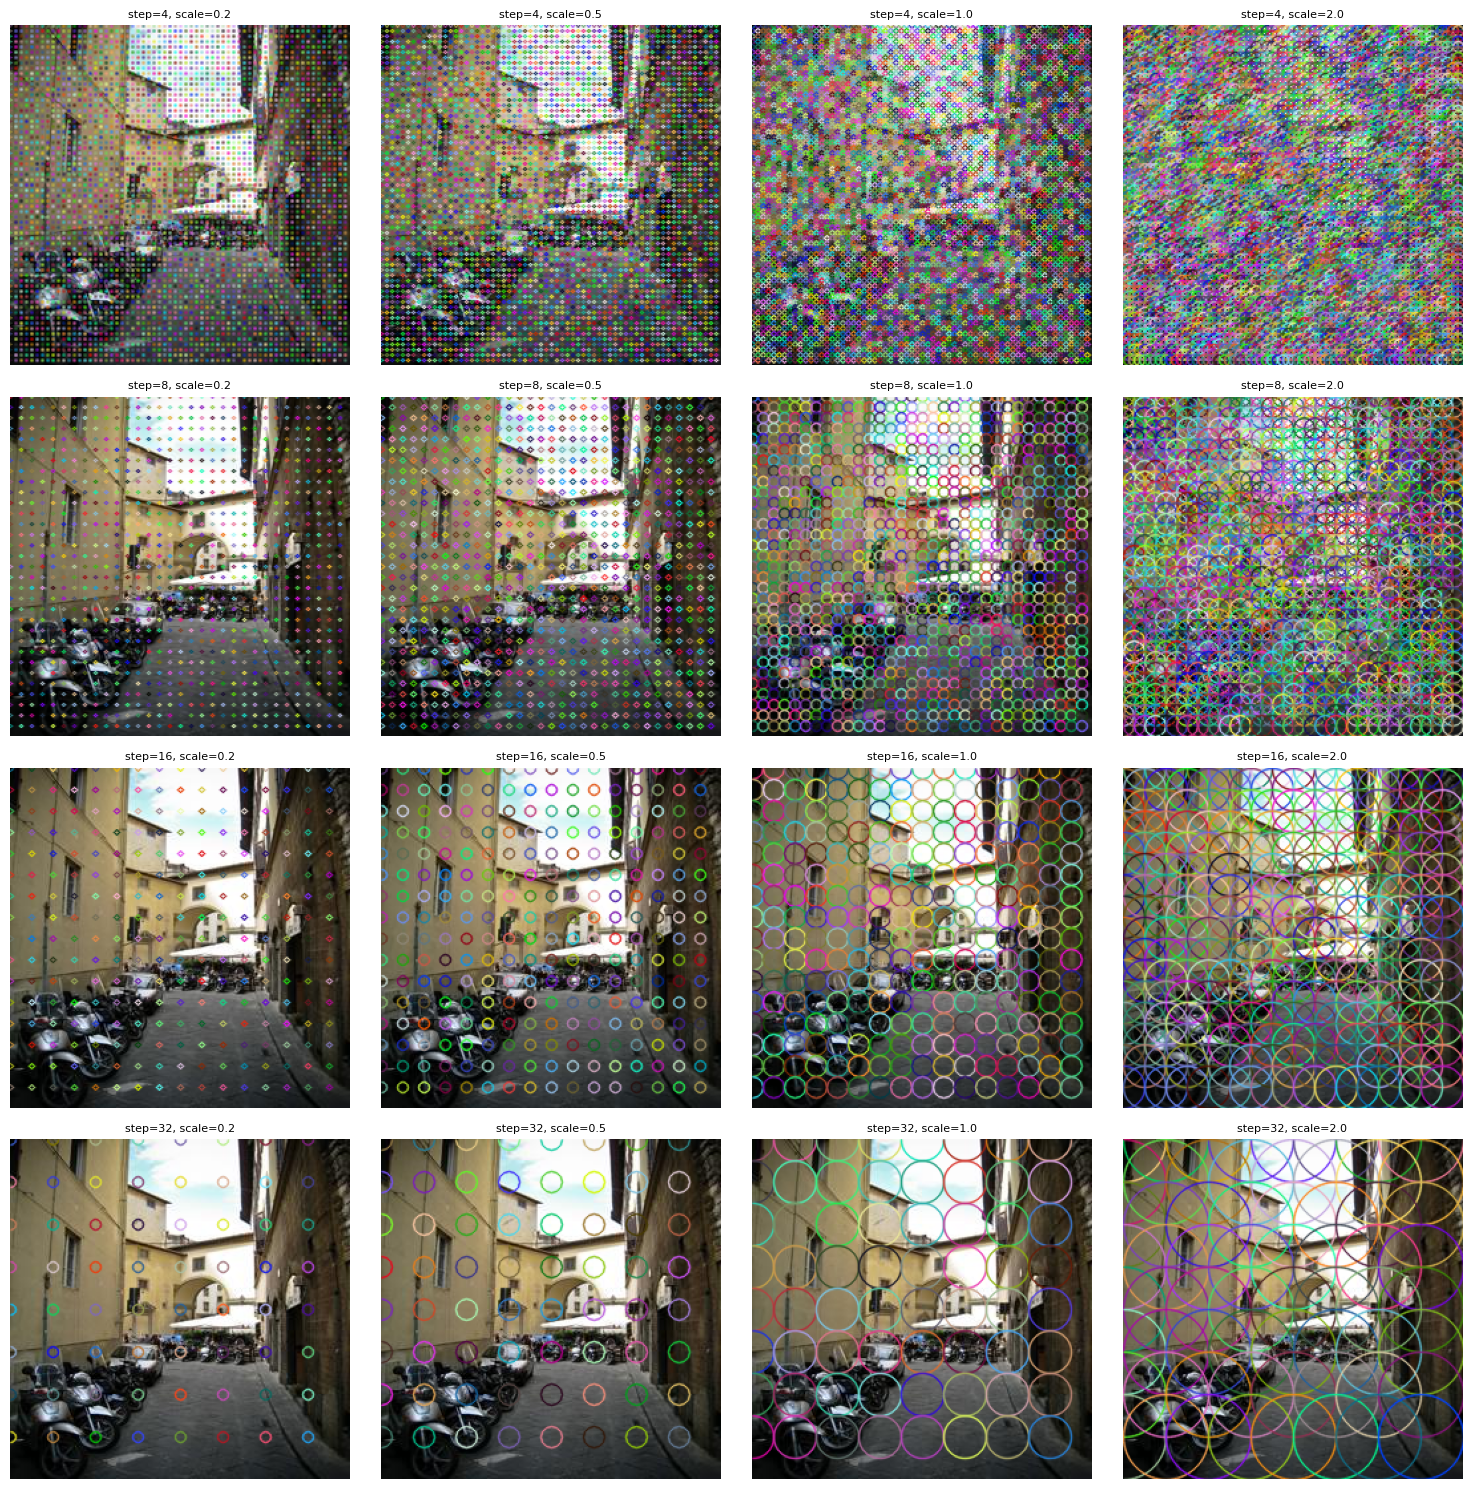

In [6]:
#Plotting keypoints detected with Dense SIFT for different step sizes and scale factors
img_pil, label = data[0]
img_rgb = np.array(img_pil)             # PIL -> numpy (RGB)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Definimos los pasos y factores de escala
step_sizes = [4, 8, 16, 32]
scale_factors = [1/4, 1/2, 1, 2]

fig, axes = plt.subplots(len(step_sizes), len(scale_factors), figsize=(15, 15))

for i, step in enumerate(step_sizes):
    for j, factor in enumerate(scale_factors):
        kp_size = step * factor  # scale = factor * step

        # Creamos un BOVW con Dense SIFT para esta combinación
        bovw = BOVW(
            detector_type="DENSE_SIFT",
            detector_kwargs={
                'step_size': step,
                'kp_size': kp_size
            }
        )

        # Generamos los keypoints en rejilla
        keypoints = bovw.kp(img_gray)

        # Dibujamos los keypoints sobre una copia de la imagen en color
        img_vis = img_rgb.copy()
        img_vis = cv2.drawKeypoints(
            img_vis,
            keypoints,
            None,
            flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS  # dibuja el tamaño (scale)
        )

        ax = axes[i, j]
        ax.imshow(img_vis)
        ax.set_title(f"step={step}, scale={factor:.1f}", fontsize=8)
        ax.axis("off")

plt.tight_layout()
plt.show()

# 4. Different Codebook sizes k (10, 100, 1000, ... )

In [11]:
#Numerical results

codebook_sizes = [50, 100, 200, 400]

detector_type = 'SIFT'

results = {}

for k in codebook_sizes:
    print(f"\n\n###############################")
    print(f"### Codebook size: {k}")
    print(f"###############################")

    kfold = KFold(n_splits=3, shuffle=True, random_state=42)

    accuracies = []

    for fold, (train_idx, test_idx) in enumerate(kfold.split(data), start=1):
        print(f"\n========== Fold {fold} ==========")
        train_data = [data[i] for i in train_idx]
        test_data  = [data[i] for i in test_idx]

        # Usar el descriptor correspondiente
        bovw = BOVW(detector_type=detector_type, codebook_size=k)
        bovw, classifier = train(dataset=train_data, bovw=bovw)

        acc = test(dataset=test_data, bovw=bovw, classifier=classifier)
        accuracies.append(acc)

    print("\n========== 3-Fold Cross-Validation ==========")
    print("Accuracies per fold:", accuracies)
    print("Average accuracy:", np.mean(accuracies))

    results[k] = {
        "fold_accuracies": accuracies,
        "mean_accuracy": np.mean(accuracies)
    }

print("\n\n===== Summary over codebook_sizes =====")
for k in codebook_sizes:
    print(f"{k}: mean accuracy = {results[k]['mean_accuracy']:.4f}")




###############################
### Codebook size: 50
###############################

========== Fold 1 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [02:29<00:00, 48.47it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3222742290748899


Phase [Eval]: Extracting the descriptors:  28%|██▊       | 1034/3634 [00:22<00:57, 45.52it/s]


KeyboardInterrupt: 

In [ ]:

#Plots and visual results

# 5. Different Classifiers (...)

In [ ]:

#Numerical results

In [ ]:

#Plots and visual results

# 6. Dimensionality reduction


# 7. Spatial Pyramids


# 8. Fisher Vectors


# 9. Conclusion

Our hyphothesis...
